Системы аналитических вычислений.

Студент: Пермяков Никита Александрович, М8О-208Б-19

Лабораторная работа №1.

## Задание 1 - часть 1 - Квадратик

In [16]:
AB = 11
BC = 23
CD = 11
AD = 23
alpha = -60

x0 = 0
y0 = 0
x1 = x0
y1 = y0 + AB
x2 = x0 + AD
y2 = y0 + AB
x3 = x0 + AD
y3 = y0

In [17]:
def rot(alpha):
    return alpha / 180 * pi
    
mat_rot = [
    [cos(rot(alpha)), sin(rot(alpha))],
    [-sin(rot(alpha)), cos(rot(alpha))]
]

def mult_matrix_vec(X, Y):
    h = len(X)
    w = len(Y)
    assert w == len(X[0]), "matrix is invalid" # and isinstance(Y[0], Integer), "matrix is invalid" 
    result = [0 for _ in range(w)]
    for j in range(h):  
        for k in range(w):  
            result[j] += X[j][k] * Y[k]  
    return result

In [ ]:
# Поворот, затем перенос относительно первоначальной системы координат
g = Graphics()

vecs1 = [[x0, y0], [x1, y1], [x2, y2], [x3, y3]]

g += polygon2d(vecs1, rgbcolor=(0,1,1))

# rotate
vecs1_rotated = []
for v in vecs1:
    v1_rotated = mult_matrix_vec(mat_rot, v)
    vecs1_rotated.append(v1_rotated)
    
g += polygon2d(vecs1_rotated, rgbcolor=(1,0,1))

# move
vecs1_rotated_moved = vecs1_rotated
for v in vecs1_rotated_moved:
    v[0] += 40
    v[1] += 15

g += polygon2d(vecs1_rotated_moved, rgbcolor=(1,1,0))

g.set_axes_range(-5, 80, -5, 40)
g.show()

In [1]:
# Перенос, затем поворот относительно первоначальной системы координат
g = Graphics()

vecs1 = [[x0, y0], [x1, y1], [x2, y2], [x3, y3]]

g += polygon2d(vecs1, rgbcolor=(0,1,1))

# move
vecs1_moved = vecs1
for v in vecs1_moved:
    v[0] += 40
    v[1] += 15
    
g += polygon2d(vecs1_moved, rgbcolor=(1,0,1))

# rotate
vecs1_rotated_moved = []
for v in vecs1_moved:
    v1_rotated = mult_matrix_vec(mat_rot, v)
    vecs1_rotated_moved.append(v1_rotated)

g += polygon2d(vecs1_rotated_moved, rgbcolor=(1,1,0))

g.set_axes_range(-5, 80, -5, 80)
g.show()
g.save('move.png')

NameError: name 'x0' is not defined

# Задание 1 - часть 2 - Исследование функции

In [3]:
f(x) = sqrt(abs(3 * pow(x, 3) + 2 * pow(x, 2) - 10 * x)) / (4 * x)

show(f(x))
type(f(x))

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

<class 'sage.symbolic.expression.Expression'>

##### 1. Область определения функции  $D$ 

x &ne; 0

In [5]:
var('x')
eq1 = x
D = solve(eq1 != 0, x, algorithm='sympy')
D

[[x < 0], [x > 0]]

###### Область значений функции E(f)

f(x) &in; E

### 2. Является ли функция четной или нечетной, является ли периодической.

#### Нечетность функции

In [6]:
(f(x) + f(-x)).expand().simplify()

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x - 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

#### Четность функции

In [7]:
(f(x) - f(-x)).expand().simplify()

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x + 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

####  Периодичность

In [8]:
var("x T")
eq1 = f(x) - f(x + T)
eq1.simplify_full()

-1/4*(x*sqrt(abs(3*T^3 + (9*T + 2)*x^2 + 3*x^3 + 2*T^2 + (9*T^2 + 4*T - 10)*x - 10*T)) - (T + x)*sqrt(abs(3*x^3 + 2*x^2 - 10*x)))/(T*x + x^2)

In [9]:
# eq1 = _
show(eq1)

-1/4*sqrt(abs(3*(T + x)^3 + 2*(T + x)^2 - 10*T - 10*x))/(T + x) + 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

In [10]:
eq1(x=1, T=1)

1/4*sqrt(5) - 1/4*sqrt(3)

In [11]:
eq1 = f(x) - f(x + T)
solve(eq1, T)
# Так как уравнение имеет абсолютные значения - оно не может быть инвертировано в комплексные значения

[T == x*(sqrt(abs(3*T^3 + (9*T + 2)*x^2 + 3*x^3 + 2*T^2 + (9*T^2 + 4*T - 10)*x - 10*T)) - sqrt(abs(3*x^3 + 2*x^2 - 10*x)))/sqrt(abs(3*x^3 + 2*x^2 - 10*x))]

Функция является **ни четной ни нечетной (функция общего вида) и не периодической**

Поскольку невыполняется ни равенство

#### f(-x) = f(x)

ни равенство

#### f(-x) = -f(x)

периодичность

#### f(x) = f(x + T) = f(x - T) 

### 3.Точки пересечения графика с осями координат.

Пересечения с осью ординат у данной функции нет, поскольку ОДЗ - $x \neq 0$ 

In [12]:
solve(f==0, x)

[x == -1/3*sqrt(31) - 1/3, x == 1/3*sqrt(31) - 1/3, x == 0]

У функции две точки пересечения с осью абсцисс, т.к. область значений f(x) &in; E find_root(f(x)==0, 1, 2)

Точка пересечения x = 0 найдена неверно, так как не входит в область допустимых значений.

### 4.Промежутки знакопостоянства.

Поскольку корни есть, но нет точек пересечения. При x = 0 неопределенность 0 != 0

In [13]:
solve(f(x) >= 0, x)

[[-3*x^2 - 2*x + 10 > 0, 3*x^2 + 2*x - 10 == 0, x != 0],
 [3*x^2 + 2*x - 10 == 0, 3*x^2 + 2*x - 10 == 0, x != 0],
 [3*x^2 + 2*x - 10 > 0, 3*x^2 + 2*x - 10 == 0, x != 0],
 [x == 0, 0 != 0],
 [0 < x, sqrt(abs(3*x^2 + 2*x - 10)*abs(x)) > 0]]

In [14]:
solve(f(x) < 0, x)

[[x < 0, sqrt(abs(3*x^2 + 2*x - 10)*abs(x)) > 0]]

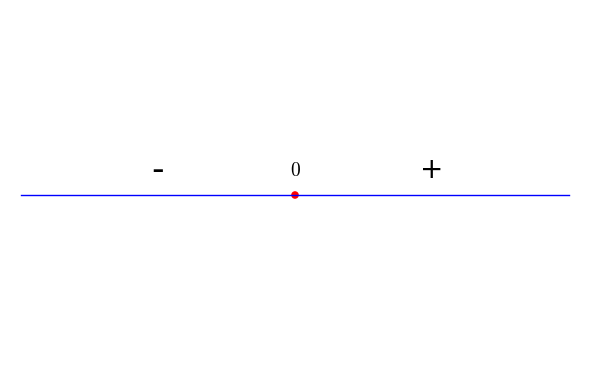

In [1]:
graph = plot(0, xmin=-1, xmax=1, ymin=-0.5, ymax=0.5)
graph += point((0, 0), color="red", size=30)
graph  += text("$0$", (0, 0.07), color="black", fontsize=14)
graph  += text("-", (-0.5, 0.07), color="black", fontsize=25) 
graph  += text("+", (0.5, 0.07), color="black", fontsize=20)
graph.show(axes=False)

### 5. Промежутки возрастания и убывания.

Производная и интервалы знакопостоянства

In [4]:
der = f.derivative()
der.show()

x |--> 1/16*((3*conjugate(x)^3 + 2*conjugate(x)^2 - 10*conjugate(x))*(9*x^2 + 4*x - 10) + (3*x^3 + 2*x^2 - 10*x)*(9*conjugate(x)^2 + 4*conjugate(x) - 10))/(x*abs(3*x^3 + 2*x^2 - 10*x)^(3/2)) - 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x^2

Положительная производная

In [5]:
solve(der > 0, x, to_poly_solve=True)

[[3*x^2 + 2*x - 10 > 0]]

In [6]:
solve(der > 0, x, algorithm='sympy')

[[x < -1/3*sqrt(31) - 1/3], [x > 1/3*sqrt(31) - 1/3]]

In [7]:
solve(der > 0, x, to_poly_solve='force')

[[3*x^2 + 2*x - 10 > 0]]

алгоритм sympy нашел положительные производные на отрезке

(x < - $\frac{1}{3}$*$\sqrt{31}$ -  $\frac{1}{3}$), (x >  $\frac{1}{3}$*$\sqrt{31}$ - $\frac{1}{3}$)

отрезок (x < A) (x > B) на графике

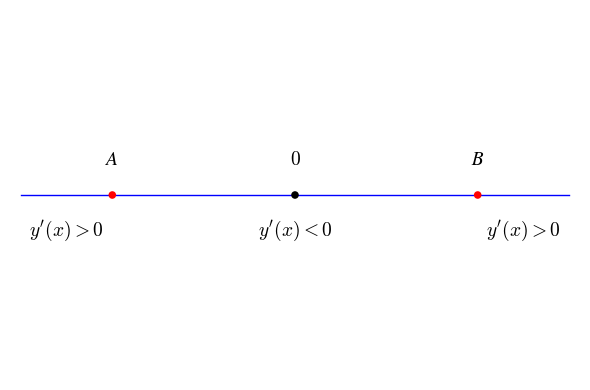

In [11]:
intervals = plot(0, xmin=-3, xmax=3, ymin=-0.5, ymax=0.5)

intervals += point( (-2, 0), color="red", size=30, zorder=10 )
intervals += point( (2, 0), color="red", size=30, zorder=10 ) 
intervals += point( (0, 0), color="black", size=30, zorder=10 ) 

intervals  += text("$А$", (-2, 0.1), color="black", fontsize=14) 
intervals  += text("$В$", (2, 0.1), color="black", fontsize=14)
intervals  += text("$0$", (0, 0.1), color="black", fontsize=14) 

intervals  += text("$y'(x) > 0$", (-2.5, -0.1), color="black", fontsize=14)
intervals  += text("$y'(x) > 0$", (2.5, -0.1), color="black", fontsize=14)
intervals  += text("$y'(x) < 0$", (0, -0.1), color="black", fontsize=14)

intervals.show(axes=False)

 ### 6. Точки экстремума и значения в этих точках.
 Экстремумов исходная функция не имеет.
 
 Есть локальные максимумы и минимумы в точках - $\frac{1}{3}$*$\sqrt{31}$ -  $\frac{1}{3}$ и $\frac{1}{3}$*$\sqrt{31}$ -  $\frac{1}{3}$ соответственно

In [17]:
# локальный максимум
f(-1/3 * sqrt(31)-1/3)

-3/4*sqrt(abs(-1/9*(sqrt(31) + 1)^3 + 2/9*(sqrt(31) + 1)^2 + 10/3*sqrt(31) + 10/3))/(sqrt(31) + 1)

In [14]:
f(-1/1000)

-3/40*sqrt(1111333/10)

In [18]:
f(-2-2/3)

-3/8

In [19]:
# локальный минимум
f(1/3*sqrt(31)-1/3)

3/4*sqrt(abs(1/9*(sqrt(31) - 1)^3 + 2/9*(sqrt(31) - 1)^2 - 10/3*sqrt(31) + 10/3))/(sqrt(31) - 1)

### 7. Непрерывность. Наличие точек разрыва и их классификация.

 График функции прерывен в точке $0$. Левосторонний и правосторонний пределы не равны, значит точка не устанимого разрыва. На области определения функция непрерывна.

In [20]:
limit(f, x=+0)

x |--> Infinity

In [21]:
limit(f, x=-0)

x |--> Infinity

### 8. асимптоты.

 Уравнения наклонных асимптот: $y = kx + b$.

Определение: $\lim_{x\to\infty} (kx + b - y(x)) = 0$

где коэффициент k:

$k = \lim_{x\to\infty} (y(x) / x)$

In [28]:
limit(f/x, x=Infinity)

x |--> 0

и коэффициент b:

$b = \lim_{x\to\infty} (y(x) - kx)$

In [29]:
limit(f, x=Infinity)

x |--> +Infinity

Получаем, что горизонтальной асимптоты не существует. Вертикальная равна $x = 0$